# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Get today's date as a string
today = pd.Timestamp.today().strftime('%Y-%m-%d')

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=10)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)


Number of cities in the list: 10
['quellon', 'blackmans bay', 'bar-sur-aube', 'kenora', 'tazacorte', 'edinburgh of the seven seas', 'den burg', 'bethel', 'bilibino', 'ribeira grande']


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    #print(city_url)

    # Get city weather response
    city_response = requests.get(city_url)
    #print(city_response)
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date_unformatted = city_weather['dt']
        city_date_struct = time.localtime(city_date_unformatted) # Raw format for the api call
        city_date = time.strftime('%Y-%m-%d', city_date_struct) # Formatted so readable to humans
    
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quellon
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | bar-sur-aube
Processing Record 4 of Set 1 | kenora
Processing Record 5 of Set 1 | tazacorte
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | den burg
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | ribeira grande
-----------------------------
Data Retrieval Complete      
-----------------------------


In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

print(city_data_df)

                          City      Lat       Lng  Max Temp  Humidity  \
0                      quellon -43.1167  -73.6167     12.21        94   
1                blackmans bay -43.0167  147.3167      8.74        92   
2                 bar-sur-aube  48.2500    4.5833     22.35        81   
3                       kenora  49.8167  -94.4337     18.54        48   
4                    tazacorte  28.6290  -17.9293     22.54        81   
5  edinburgh of the seven seas -37.0676  -12.3116     16.17        88   
6                     den burg  53.0542    4.7972     13.98        74   
7                       bethel  41.3712  -73.4140     24.72        56   
8                     bilibino  68.0546  166.4372      4.93        59   
9               ribeira grande  38.5167  -28.7000     21.22        83   

   Cloudiness  Wind Speed Country        Date  
0         100        6.75      CL  2024-06-08  
1         100        0.45      AU  2024-06-08  
2         100        2.96      FR  2024-06-08  
3   

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,quellon,-43.1167,-73.6167,12.21,94,100,6.75,CL,2024-06-08
1,blackmans bay,-43.0167,147.3167,8.74,92,100,0.45,AU,2024-06-08
2,bar-sur-aube,48.2500,4.5833,22.35,81,100,2.96,FR,2024-06-08
3,kenora,49.8167,-94.4337,18.54,48,40,4.12,CA,2024-06-08
4,tazacorte,28.6290,-17.9293,22.54,81,75,3.09,ES,2024-06-08


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quellon,-43.1167,-73.6167,12.21,94,100,6.75,CL,2024-06-08
1,blackmans bay,-43.0167,147.3167,8.74,92,100,0.45,AU,2024-06-08
2,bar-sur-aube,48.2500,4.5833,22.35,81,100,2.96,FR,2024-06-08
3,kenora,49.8167,-94.4337,18.54,48,40,4.12,CA,2024-06-08
4,tazacorte,28.6290,-17.9293,22.54,81,75,3.09,ES,2024-06-08


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

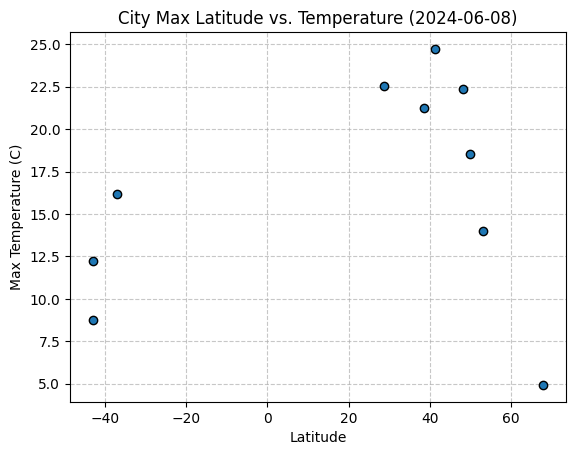

In [35]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Max Latitude vs. Temperature ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

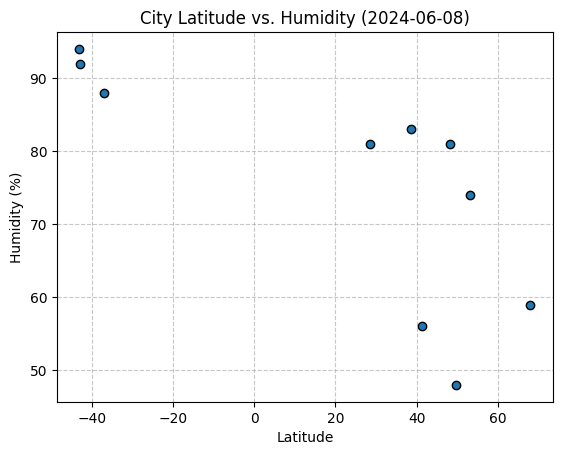

In [36]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

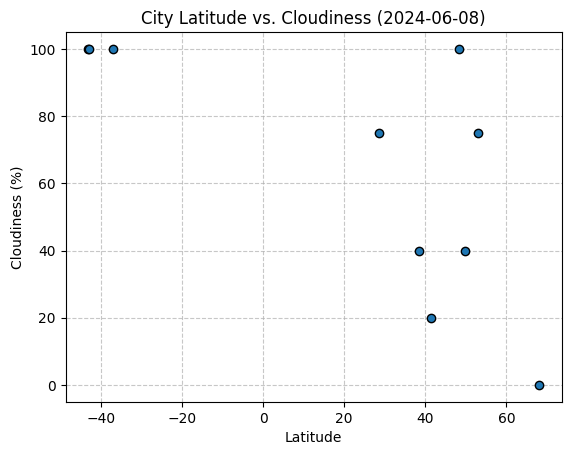

In [37]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

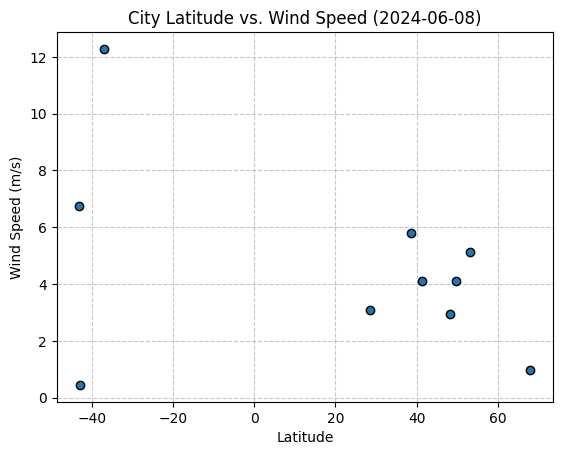

In [38]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots

def create_linear_regression(x, y, x_titles, y_titles):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
  

    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)

    regress_values = x * slope + intercept
    #print(regress_values)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)

# Create Plot
    plt.scatter(x,y, edgecolors='black')
    plt.title(f"{x_titles} vs. {y_titles} ({today})") 
    plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.grid(linestyle='--', alpha=0.7) 
    plt.gca().set_axisbelow(True)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
    plt.show()

# Create line equation string
#line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

#create_linear_regression(x_values, y_values)

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bar-sur-aube,48.2500,4.5833,22.35,81,100,2.96,FR,2024-06-08
3,kenora,49.8167,-94.4337,18.54,48,40,4.12,CA,2024-06-08
4,tazacorte,28.6290,-17.9293,22.54,81,75,3.09,ES,2024-06-08
6,den burg,53.0542,4.7972,13.98,74,75,5.14,NL,2024-06-08
7,bethel,41.3712,-73.4140,24.72,56,20,4.12,US,2024-06-08


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,quellon,-43.1167,-73.6167,12.21,94,100,6.75,CL,2024-06-08
1,blackmans bay,-43.0167,147.3167,8.74,92,100,0.45,AU,2024-06-08
5,edinburgh of the seven seas,-37.0676,-12.3116,16.17,88,100,12.28,SH,2024-06-08


###  Temperature vs. Latitude Linear Regression Plot

r-value  :  -0.8609776393705383 
p-value  :  0.012824183274409174 
std-error:  0.12514644004975378
y = -0.47x + 40.5


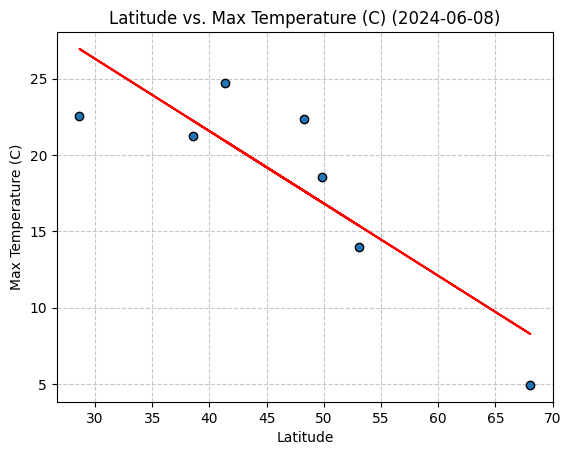

In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Latitude', 'Max Temperature (C)' )

y = 0.39x + 27.29
City_ID
0      12.191600
1      23.778245
4      10.288586
6      19.086074
8      17.593815
         ...    
548    10.807136
549    23.550241
554    23.636376
557     9.457288
560    16.156169
Name: Lat, Length: 178, dtype: float64


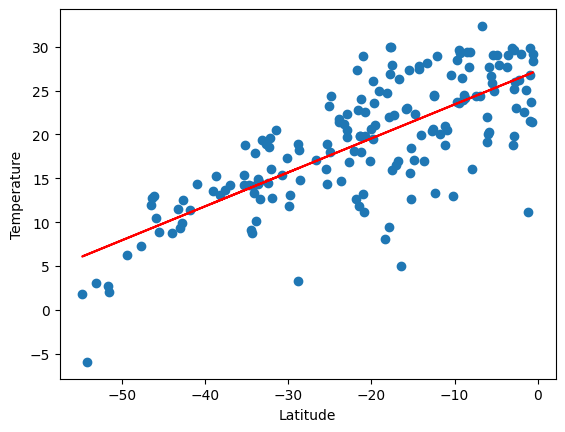

In [ ]:
# Linear regression on Southern Hemisphere
sh_x_values = southern_hemi_df['Lat']
sh_y_values = southern_hemi_df['Max Temp']

create_linear_regression(sh_x_values, sh_y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE